<a href="https://www.kaggle.com/code/ivansiat/bellabeat-case-study-capstone-project?scriptVersionId=105376179" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Case Study 2 - Bellabeat


## Summary

In this case study scenario, Bellabeat has tasked me, as a junior analyst, to view and analyze trends in in smart device usage so that they can use this information to apply it to their own customers and marketing strategies.

## Scenario

In this case study scenario, Bellabeat has tasked me, as a junior analyst, to view and analyze trends in in smart device usage so that they can use this information to apply it to their own customers and marketing strategies.

You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

## Ask Phase 

#### What is the problem you are trying to solve?
* Trends in smart device usage
* How these trends apply to Bellabeat Customers
* How these trends can influence Bellabeat's marketing strategy


### Business Task 
* Find and analyze smart device usage trends from non-Bellabeat devices to be able to apply this knowledge to Bellabeat's own customers and marketing strategy

Stakeholders 

* Urška Sršen - Bellabeat cofounder and Chief Creative Officer 
* Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team 
* Bellabeat Marketing Analytics team 

## Prepare Phase

#### Dataset used: 
* [Fitbit Fitness Tracker Data]('https://www.kaggle.com/datasets/arashnic/fitbit'), a dataset made available through [Mobius]('https://www.kaggle.com/arashnic')


#### Accessibility and privacy of data: 
* Data is open-source and license is of the public domain, which makes the data available for everyone to copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission.

#### Information about our Dataset: 

* This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

#### Data Organization: 

* Data is organized in 18 .csv Spreadsheets and is in both wide and long format. Below is a list of the file names, in a Microsoft Excel CSV format:

| CSV Name |
| --- |
| dailyActivity_merged | 
|dailyCalories_merged |
| dailyIntensities_merged | 
| dailySteps_merged | 
| heartrate_seconds_merged | 
| hourlyCalories_merged | 
| hourlyIntensities_merged | 
| hourlySteps_merged |
| minuteCaloriesNarrow_merged | 
| minuteCaloriesWide_merged | 
| minuteIntensitiesNarrow_merged |
| minuteIntensitiesWide_merged | 
| minuteMETsNarrow_merged | 
| minuteSleep_merged | 
| minuteStepsNarrow_merged | 
| minuteStepsWide_merged | 
| sleepDay_merged | 
| weightLogInfo_merged |

#### Data Credibility and Integrity:

* Sample Size (30) and no further information about the user demographic could lead to unknown biases. Data set might not be representative of the smart device user base.

## Process Phase

I will process and analyze the data in R because of its convenience in processing and visualizing data in one place.

### Installing packages and opening libraries 

We will use the following packages to help us in our cleaning processes and analysis:


| Library Name | Usage |
| --- | --- |
| tidyverse | For general purposes and visualization through ggplot2 |
| janitor | For data cleaning |
| skimr | For summarizing data |
| here | For referencing files |
| lubridate | For scatterplot generation |


In [1]:
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(lubridate)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Importing datasets 

We will be uploading the three main data sets that are necessary to aid us in our analyses:
 
 * Daily_activity 
 * Daily_sleep 
 * Hourly_steps
 

In [2]:
daily_activity <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

### Data Preview

We can use head() and str() functions to preview our datasets and its columns:

#### Preview of Daily Activity:

In [3]:
head(daily_activity)
str(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


spec_tbl_df [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 22

#### Preview of Daily Sleep:

In [4]:
head(daily_sleep)
str(daily_sleep)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


spec_tbl_df [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


#### Preview of Hourly Steps:

In [5]:
head(hourly_steps)
str(hourly_steps)

Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


spec_tbl_df [22,099 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : num [1:22099] 373 160 151 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   StepTotal = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


We can also check the number of participants by using the n_distinct() function on our Id variable:

In [6]:
n_distinct(daily_activity$Id)
n_distinct(daily_sleep$Id)
n_distinct(hourly_steps$Id)

[1] 33

[1] 24

[1] 33

### Cleaning Dataset - Duplicates

Check the data for duplicates and clean them out:

In [7]:
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(hourly_steps))

[1] 0

[1] 3

[1] 0

Here we see that theres a duplicate in the daily_sleep data set, so we clean it using the drop_na() function from the tidyr package:

In [8]:
daily_sleep <- daily_sleep %>%
  distinct() %>%
  drop_na()

then we run sum(duplicated()) again to confirm that the duplicates are removed:

In [9]:
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(hourly_steps))

[1] 0

[1] 0

[1] 0

### Cleaning Dataset - Column Syntax

We use the clean_names() and rename_with() functions from the janitor package to make sure our columns folow the same syntax for ease of access during the analysis and visualization phase:

In [10]:
clean_names(daily_activity)
daily_activity<- rename_with(daily_activity, tolower)

clean_names(daily_sleep)
daily_sleep <- rename_with(daily_sleep, tolower)

clean_names(hourly_steps)
hourly_steps <- rename_with(hourly_steps, tolower)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


id,activity_hour,step_total
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0
1503960366,4/12/2016 6:00:00 AM,0
1503960366,4/12/2016 7:00:00 AM,0
1503960366,4/12/2016 8:00:00 AM,250


#### Cleaning Dataset - Date and Time

Now that we have verified our column names and change them to lower case, we will focus on cleaning date-time format for daily_activity and daily_sleep since we will merge both data frames. Since we can disregard the time on daily_sleep data frame we are using as_date instead as as_datetime

In [11]:
daily_activity <- daily_activity %>%
  rename(date = activitydate) %>%
  mutate(date = as.Date(date, format = "%m/%d/%Y"))

daily_sleep <- daily_sleep %>%
  rename(date = sleepday) %>%
  mutate(date = as.Date(date,format ="%m/%d/%Y %I:%M:%S %p"))

Now we run the head() function again to see if our date columns have changed

In [12]:
head(daily_activity)
head(daily_sleep)

id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


And since the time is tracked hourly in hourly_steps, we use the date_time format:

In [13]:
hourly_steps<- hourly_steps %>% 
  rename(date_time = activityhour) %>% 
  mutate(date_time = as.POSIXct(date_time,format ="%m/%d/%Y %I:%M:%S %p"))

head(hourly_steps)

id,date_time,steptotal
<dbl>,<dttm>,<dbl>
1503960366,2016-04-12 00:00:00,373
1503960366,2016-04-12 01:00:00,160
1503960366,2016-04-12 02:00:00,151
1503960366,2016-04-12 03:00:00,0
1503960366,2016-04-12 04:00:00,0
1503960366,2016-04-12 05:00:00,0


#### Cleaning Dataset - Merging

Since our main datasets are daily_activity and daily_sleep, we will merge them together by id and date to see any correlation between them and put them in a new data set named daily_activity_sleep:

In [14]:
daily_activity_sleep <- merge(daily_activity, daily_sleep, by=c ("id", "date"))
glimpse(daily_activity_sleep)

Rows: 410
Columns: 18
$ id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ totalsteps               <dbl> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ totaldistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ trackerdistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ loggedactivitiesdistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactivedistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ moderatelyactivedistance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0.3…
$ lightactivedistance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4.6…
$ sedentaryactivedistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactiveminutes        <dbl> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ fairlyactiveminutes      <dbl> 13, 19, 34, 10, 20, 31, 12, 8, 21, 5, 14, 23,…
$ lightlyactivemin

## Analyze/Share Phase

Now that we have our two main datasets merged, we can analyze and visualize the data and see if there are any correlations between them so that we can make recommendations to Bellabeat's customers and marketing team. 



First we determine the days of the week in our dataset by using the weekday() function and viewing a glimpse of the new dataframe to check our work:

In [15]:
weekday_steps_sleep <- daily_activity_sleep %>%
  mutate(weekday = weekdays(date))

glimpse(weekday_steps_sleep)

Rows: 410
Columns: 19
$ id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ totalsteps               <dbl> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ totaldistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ trackerdistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ loggedactivitiesdistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactivedistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ moderatelyactivedistance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0.3…
$ lightactivedistance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4.6…
$ sedentaryactivedistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactiveminutes        <dbl> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ fairlyactiveminutes      <dbl> 13, 19, 34, 10, 20, 31, 12, 8, 21, 5, 14, 23,…
$ lightlyactivemin

We then order our data by the days of the week (Monday to Sunday) and check our work again:

In [16]:
weekday_steps_sleep$weekday <- ordered(weekday_steps_sleep$weekday, levels = c("Monday", "Tuesday", "Wednesday", "Thursday",
"Friday", "Saturday", "Sunday"))
                                       
weekday_steps_sleep <-weekday_steps_sleep%>%
  group_by(weekday) %>%
  summarize (daily_steps = mean(totalsteps), daily_sleep = mean(totalminutesasleep))

weekday_steps_sleep


weekday,daily_steps,daily_sleep
<ord>,<dbl>,<dbl>
Monday,9273.217,419.5000
Tuesday,9182.692,404.5385
Wednesday,8022.864,434.6818
Thursday,8183.516,401.2969
Friday,7901.404,405.4211
Saturday,9871.123,419.0702
Sunday,7297.855,452.7455


From a quick glance of our data, we can see that the most steps happen on Saturday, which is assumed to be when most of the average users get a day off from their jobs. 

In terms of sleep, we can see that the most minutes of sleep happens on Sunday, which is assumed to be because of the start of the workweek the next day and people want to get their full rest in.




#### Visualization - Steps, Minutes/Hours of Sleep, and Correlations


One statistic we can check is to see if users are getting the daily recommended steps and hours of sleep. 

A famous metric that we always hear, but the US department of Health also recommends, is that we try to hit 10,000 steps per day to achieve an active lifestyle. ([Source]("https://health.gov/sites/default/files/2019-09/Physical_Activity_Guidelines_2nd_edition.pdf#page=55"))

In terms of sleep, the National Sleep Foundation recommends an average of 8 hours of sleep for adults, which is 480 minutes when converted. ([Source]("https://pubmed.ncbi.nlm.nih.gov/29073412/"))

That aside, we can view our data better by plotting it on a chart using ggplot2, starting with the daily steps by weekday and adding a line to see if users meet the recommended 10,000 steps per day:

That aside, we can view our data better by plotting it on a chart using ggplot2, starting with the daily steps by weekday and adding a line to see if users meet the recommended 10,000 steps per day:

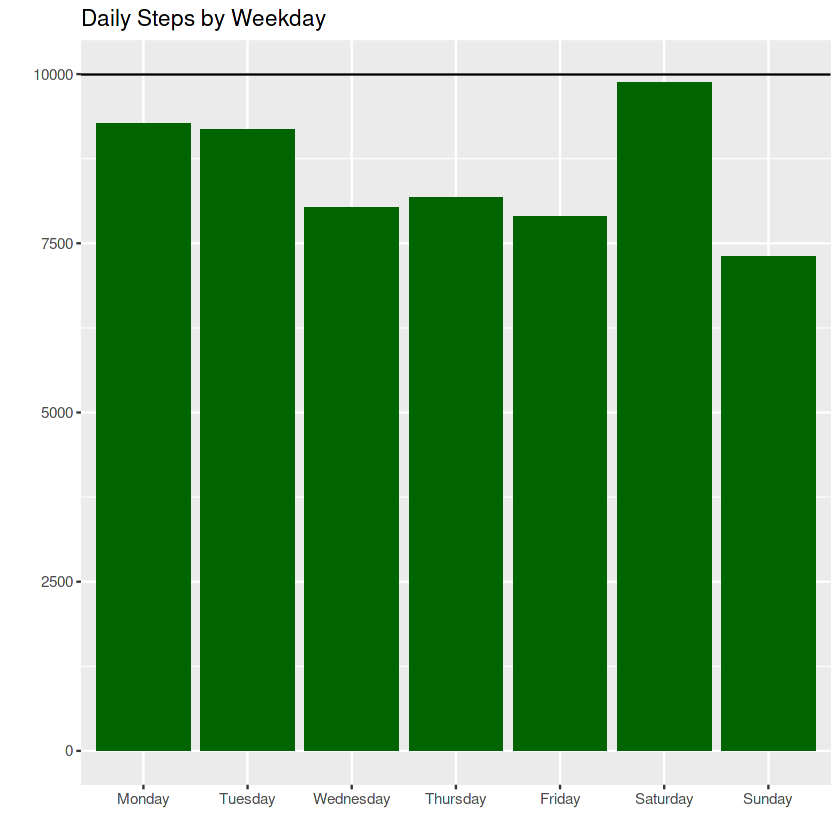

In [17]:
 ggplot(weekday_steps_sleep) +
      geom_col(aes(weekday, daily_steps), fill = "#006400") +
      labs(title = "Daily Steps by Weekday", x= "", y = "") +
      geom_hline(yintercept = 10000) 

And we do the same for daily sleep minutes by weekday, and add a line to see if users meet the recommended 8 hours (480 minutes) of sleep per day:

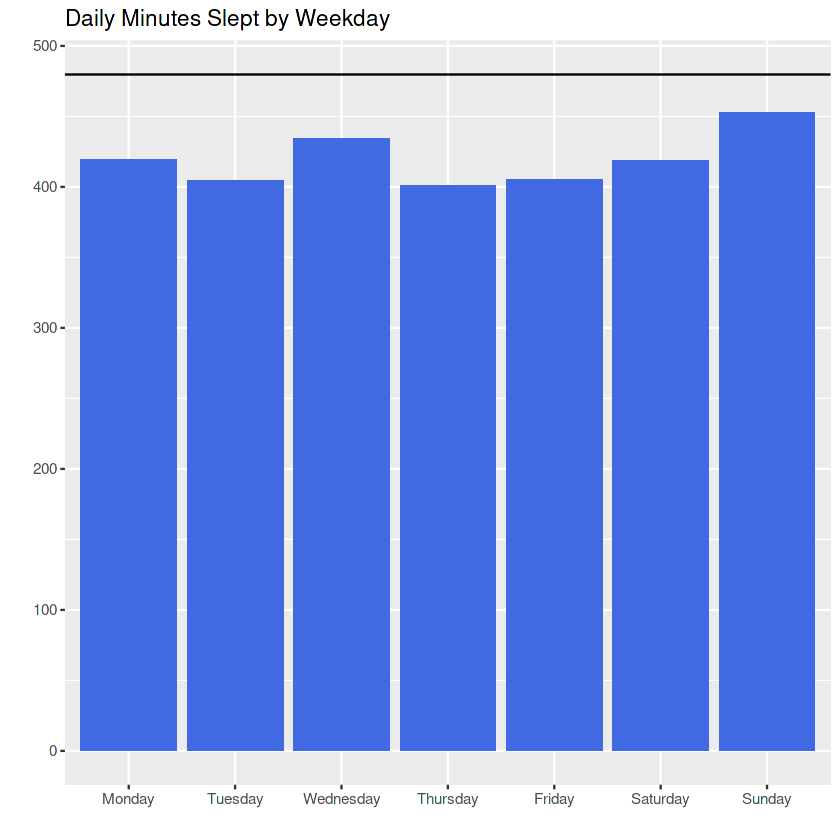

In [18]:
 ggplot(weekday_steps_sleep) +
      geom_col(aes(weekday, daily_sleep), fill = "#4169e1") +
      labs(title = "Daily Minutes Slept by Weekday", x= "", y = "") +
      geom_hline(yintercept = 480)

From the data we have gathered, it seems like users barely meet both the recommended steps and hours of sleep per day. 

We can make recommendations to Bellabeat by sending notifications or reminders to encourage their users to do their best to get those extra steps throughout the day, and get those extra minutes of sleep before bed.



The next step we will take is to try and find a correlation between minutes of sleep and steps per weekday (i.e. does more steps equal more sleep minutes) by using a scatter plot diagram:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



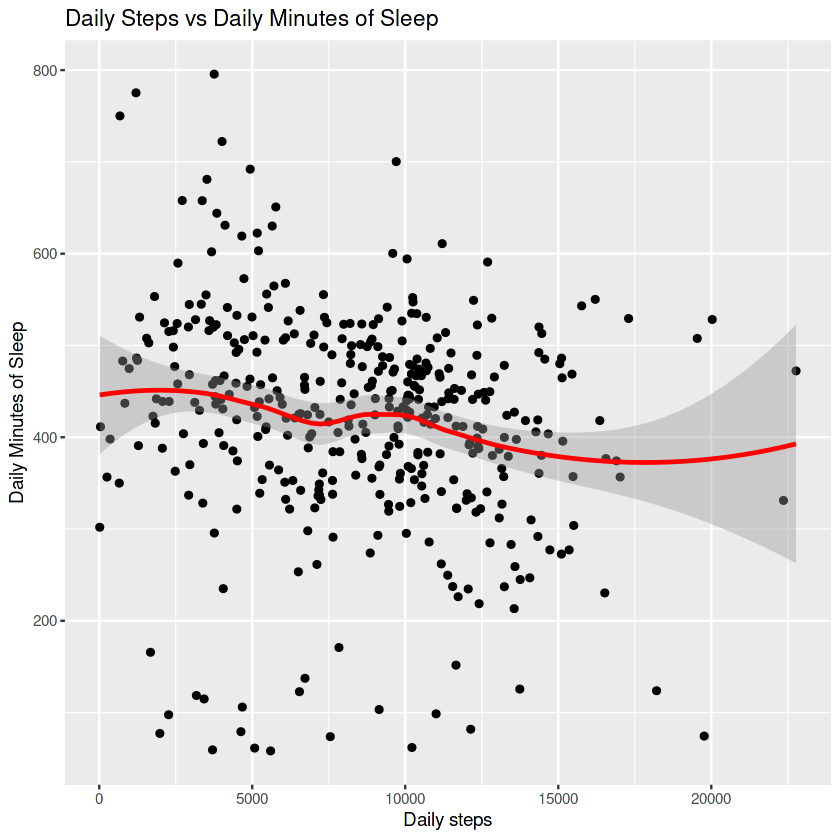

In [19]:
ggplot(daily_activity_sleep, aes(x=totalsteps, y=totalminutesasleep))+
  geom_jitter() +
  geom_smooth(color = "red") + 
  labs(title = "Daily Steps vs Daily Minutes of Sleep", x = "Daily steps", y= "Daily Minutes of Sleep") 

From the scatter plot we have visualized, it doesnt seem like there is a correlation between daily steps vs daily minutes of sleep. 

We can make sure that theres no correlation between them by checking our work with variables that have obvious correlation, like total steps vs calories which is in our daily_activity dataframe:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



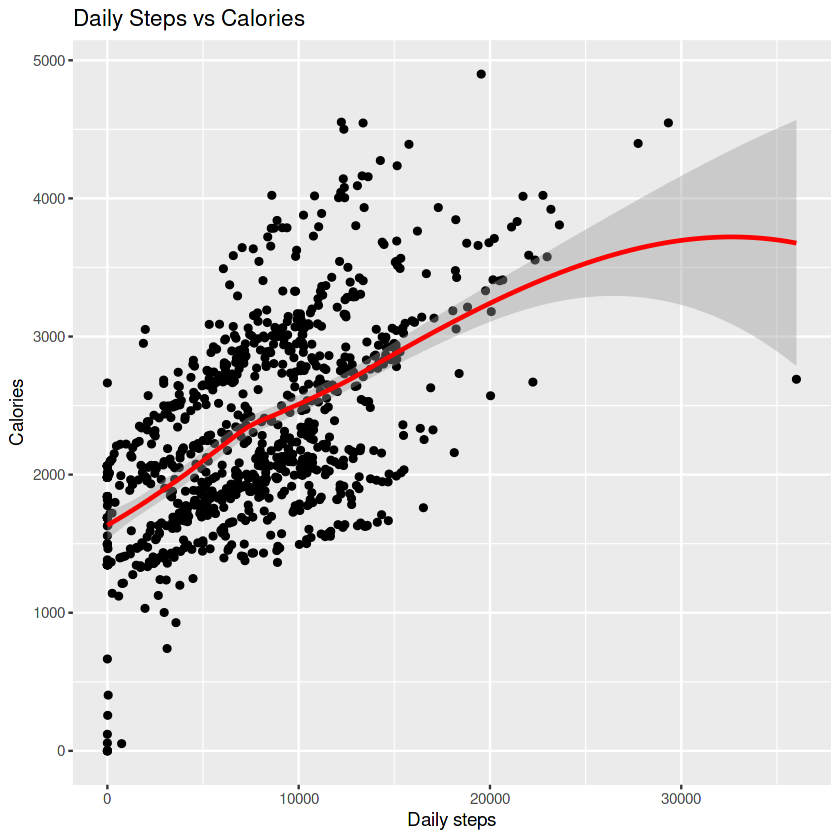

In [20]:
ggplot(daily_activity, aes(x=totalsteps, y=calories))+
  geom_jitter() +
  geom_smooth(color = "red") + 
  labs(title = "Daily Steps vs Calories", x = "Daily steps", y= "Calories") 

Here we can see more of a relationship between steps and calories because of the red line.

#### Visualization - Active Hours of the day

Next we analyze at what time of day the users are the most and least active. To do this, we make a new dataframe called count_hourly that has a variable that will hold just the hourly time, instead of date_time.

In [21]:
count_hourly <- hourly_steps
count_hourly$date_time <- format(count_hourly$date_time, format = "%H")

Then we plot it on a bar chart to see our data visualized:

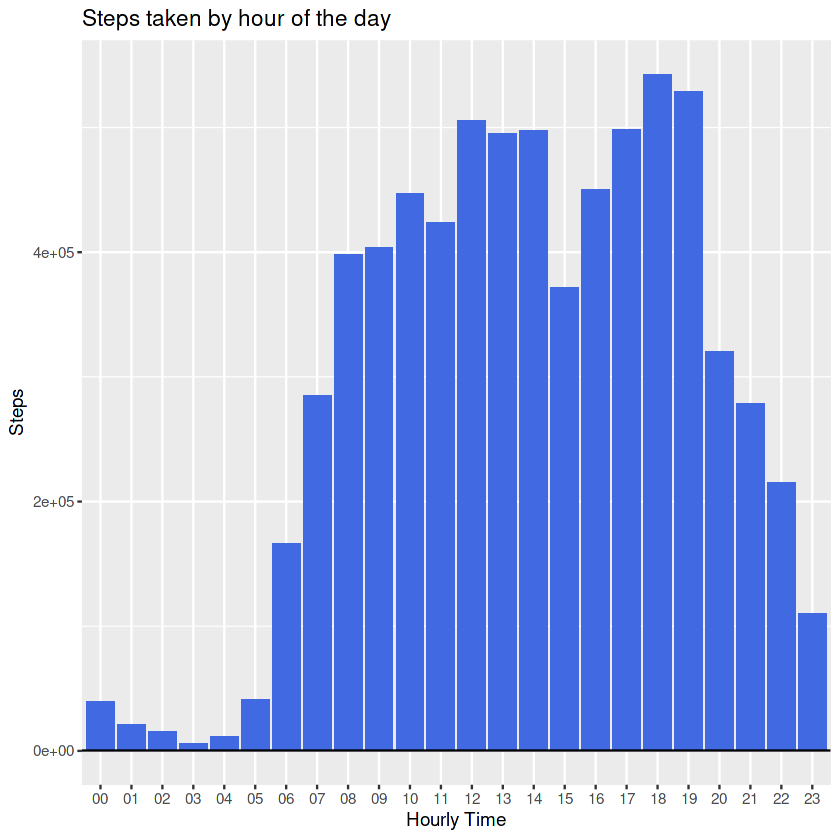

In [22]:
 ggplot(count_hourly) +
      geom_col(aes(date_time, steptotal), fill = "#4169e1") +
      labs(title = "Steps taken by hour of the day", x= "Hourly Time", y = "Steps") +
      geom_hline(yintercept = 480)

Here we can see that our users start to get active around Hour 6 (6:00 A.M) for our early risers. On the opposite end, we can see that user steps start to wind down around Hour 20 - 23 (8:00 P.M. - 11:00 P.M.), which is when most workers go to sleep.

At Hour 16 (4:00 P.M.), we can see a big burst of steps taken until Hour 19 (7:00 P.M). We can make a recommendation to Bellabeat to send a notification that the user is doing a good job and to keep their steps up since its easy to continue being active if they are already active during 4:00 P.M to 7:00 P.M.

#### Visualization - Sedentary Minutes vs Sleep Minutes Correlation

Lastly, we can check the relationship between the time that the users are sedentary vs the total minutes of sleep that they achieve per day, to see if we can make any recommendations. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



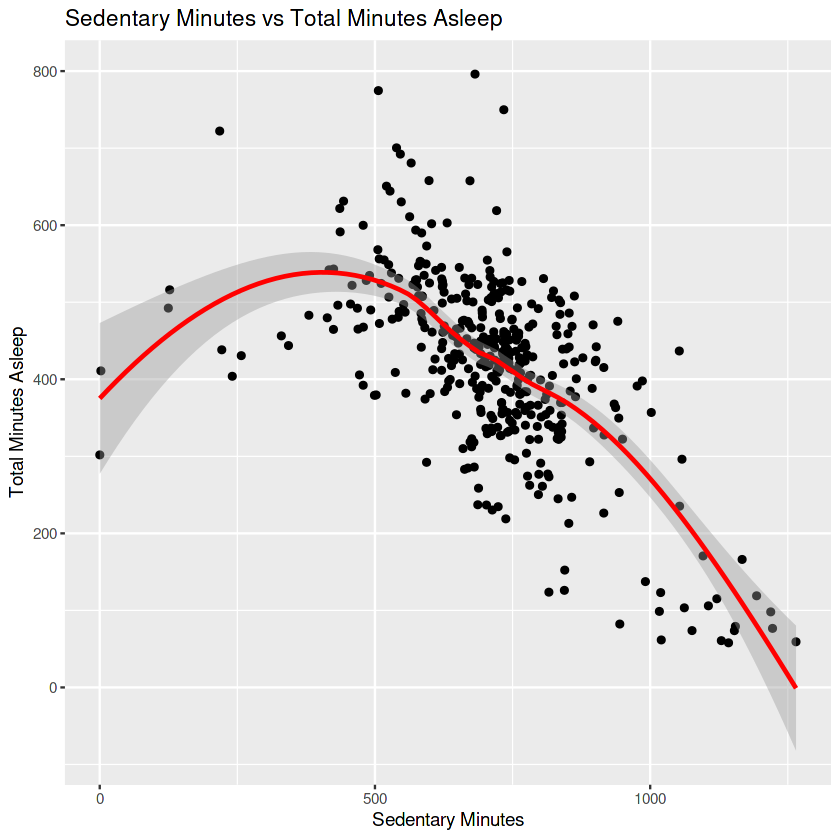

In [23]:
ggplot(daily_activity_sleep, aes(x=sedentaryminutes, y=totalminutesasleep))+
  geom_jitter() +
  geom_smooth(color = "red") + 
  labs(title = "Sedentary Minutes vs Total Minutes Asleep", x = "Sedentary Minutes", y= "Total Minutes Asleep") 

Here we can see a downtrend in the relationship between sedentary minutes and sleeping minutes, meaning that the more minutes that users spent sedentary, the less sleep they get. We can make some recommendations in this area by sending users a notification about their sleep being affected negatively by staying inactive. 

## Summary/Act Phase

Bellabeat is a health-tech company that focuses their development of products for their female userbase. For the future, it would be much more beneficial if Bellabeat asks for consent from their users to track their own userbase in order to analyze more closely related data. That way, the data analysts can make more involved analyses and they can make recommendations that apply more closely to Bellabeat's users. 

But working with the dataset we were given, the target market for Bellabeat looks like it is the average hard working women with careers or full-time jobs. This assumption is made because of the patterns seen in the data, where the Steps Taken by Hour of Day chart shows us that most of the activity happens during most working hours (6:00 A.M. to 11:00 P.M.). 

With that being said, we know what hours of the day we can send notifications to our users. These notifications will help our users be reminded of the goal they need to hit so that they can achieve a healthy, active lifestyle. Action points include (but not limited to):





| Action Point | Description |
| ------- | ------- |
| **1.) Rewards system** | If Bellabeat is going to ask for consent to obtain their user's data, there needs to be an incentive so that users feel more enticed to participate. One way to do this is to introduce a **rewards system to users that opt-in for data gathering.** Bellabeat can develop this by having their users **earn Bellapoints by achieving fitness goals and having a rewards store** available that has **Bellabeat gift cards, and women's health and fitness related items.** This way, we can hit two birds with one stone by **having consenting users provide us more accurate data for future analyses and also encouraging them to hit their goals consistently in order to purchase from the rewards store.** |
| **2.) Notification reminders during active hours** | Since we know what time users are active, we can send notifications to Bellabeat users during the active hours of 6:00 A.M. to 11:00 P.M. One example can be a **goal reminder notification sent near the end of the working hours, which is 5:00 PM to 6:00 PM, where the app reminds the user how close they are to the goal of 10,000 steps a day.** Another example is a **sleep reminder notification around the hours of 9:00 PM to 10:00 PM, where the users can be reminded to sleep soon so that they can get their full 480 minutes of sleep in.**|
| **3.) Calorie watch** | Since we know our users are concerned about keeping track of the fitness metrics, we can safely assume that they also care about their daily caloric intake to maintain a healthy weight. Since our scatter plot indicated a positive relationship between steps taken and calories, we can send **alerts to our users during lunch and dinner hours about keeping track of their calories** so that their daily steps help provide more of an impact to their weight management. Bellabeat can **remind their users about their daily calorie goals**, depending on the capabilities and features of the app. Also, **during the morning or 3 to 4 hours before lunch or dinner hours, the app can also send recipe ideas of healthy meals to the users** to help aid the daily struggle of having to think of what to cook. These recipes can **include the total calorie count and nutrients, like protein,** contained in the meal.|

# Thank you for reading my Analysis Capstone Project for the Google Data Analytics Course!